| Model                         | Type          |
|-------------------------------|---------------|
| Logistic Regression            | Discriminative|
| Support Vector Machine (SVM)   | Discriminative|
| Linear Discriminant Analysis (LDA) | Generative    |
| Quadratic Discriminant Analysis (QDA) | Generative    |
| Naive Bayes                   | Generative    |
| k-Nearest Neighbors (k-NN)    | Discriminative|
| Decision Trees               | Discriminative|
| Random Forests               | Discriminative|
| Gradient Boosting Machines (e.g., XGBoost) | Discriminative|
| Neural Networks (MLP, CNN, RNN)| Discriminative|
| Hidden Markov Models (HMM)    | Generative    |
| Gaussian Mixture Models (GMM) | Generative    |
| Generative Adversarial Networks (GANs) | Generative (Generator) + Discriminative (Discriminator) |


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()

# For Simplicity let's consider only two features
X = iris.data[:, :2]
y = iris.target

N = X.shape[0]

# Do the Train and Validation Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Define out custon Naive Bayes Classifier
class myNBClassifier(object):
    """Custom Naive Bayes Classifier"""
    def __init__(self):
        self.means = []
        self.stds =  []


    def myGaussian(self, x, mu, sig):
        """Gaussian function to compute likelihood"""
        lhd = 1/(sig * np.sqrt(2 * np.pi))*np.exp(- (x - mu )**2 / (2 * sig**2) )
        return lhd

    def fit(self, data, label):
        """Train our model with training data and labels given"""
        self.c = list(Counter(y).keys())
        dataset = np.column_stack((data, label))

        for g in self.c:
            segment = dataset[dataset[:,2]==g][:,:-1]
            f1, f2 = np.hsplit(segment,2)
            self.means.append([np.round(np.mean(f1),2),np.round(np.mean(f2),2)])
            self.stds.append([np.round(np.std(f1),2),np.round(np.std(f2),2)])


    def predict(self, data):
        """Predict the class for a given set of inputs"""
        fn =data.shape[1]
        mypred = []
        for row in data:
            likelihood = []
            for l in self.c:
                mus = self.means[l]
                sigs = self.stds[l]
                lkd = 0
                for i in range(fn):
                    lkd+=np.log(self.myGaussian(row[i], mus[i], sigs[i]))
                likelihood.append(lkd+np.log(1./len(self.c)))
            mypred.append(np.argmax(likelihood))

        return np.asarray(mypred)

In [ ]:
# Create an instance of our Classifier
myNB = myNBClassifier()

# Train with training data
myNB.fit(X_train, y_train)

# Predict class for test data
pred = myNB.predict(X_test)

# Compute the accuracy
acc = accuracy_score(y_test, pred)*100

# Print out the accuracy of our classifier
print("Accuracy of our model: {}%".format(np.round(acc, 2)))

Accuracy of our model: 76.67%


## LDA

##  LDA as a Classifier (most common usage)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict
y_pred = lda.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9444444444444444


## Using LDA for Dimensionality Reduction + Other Classifier

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Then use another classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)


## Projecting MNIST data using a trained LDA model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, y)
X_lda = lda.transform(X_scaled)

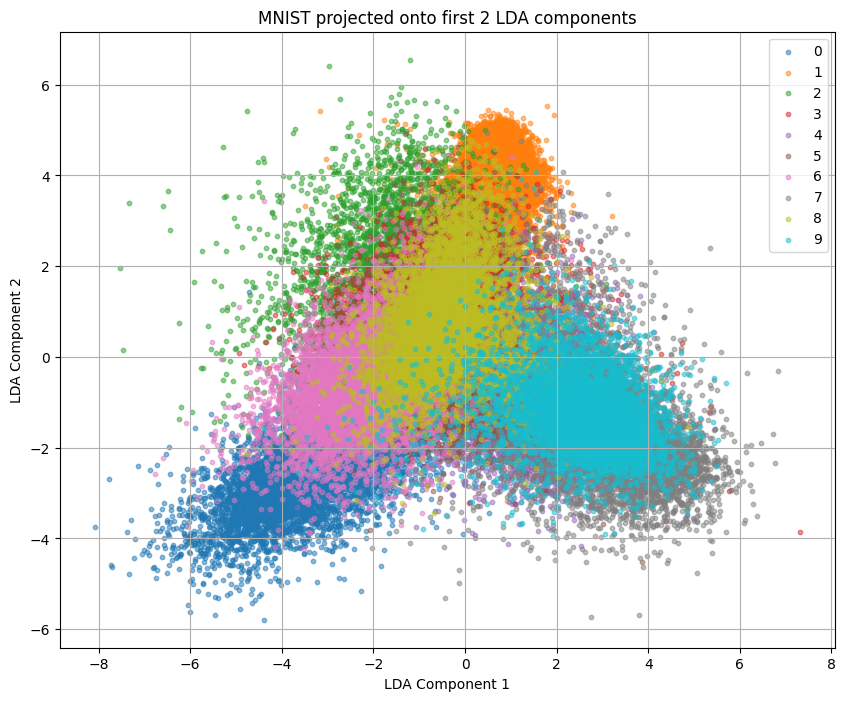

In [ ]:
import matplotlib.pyplot as plt

# Use only first two LDA components for plotting
plt.figure(figsize=(10, 8))
for digit in np.unique(y):
    idx = y == digit
    plt.scatter(X_lda[idx, 0], X_lda[idx, 1], label=str(digit), alpha=0.5, s=10)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('MNIST projected onto first 2 LDA components')
plt.legend()
plt.grid(True)
plt.show()